In [14]:
%matplotlib notebook
import pandas
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading data
gr_list = np.loadtxt('None_2016-03-30_Gr.txt')
r_grid = np.loadtxt('None_2016-03-30_rgrid.txt')

In [3]:
elm = pandas.read_csv('None_2016-03-30_Element.txt', header=None)
el_list = elm.values.tolist()
sg = pandas.read_csv('None_2016-03-30_SpaceGroupSymbol.txt', header=None)
sg_list = sg.values.tolist()

In [12]:
el_list[:20]

[['Mg2H6Os1.cif'],
 ['Th1C1.cif'],
 ['Na2O1.cif'],
 ['In1Pd2Au1.cif'],
 ['Sm1Mg2Ag1.cif'],
 ['Ce1In1Au2.cif'],
 ['Be1Fe2Si1.cif'],
 ['Sm2Tl1Ag1.cif'],
 ['K8Al6Si6Cl2O24.cif'],
 ['Ho1Mg1.cif'],
 ['Hg3Bi1.cif'],
 ['Li1Zn2Ir1.cif'],
 ['Ho2Rh4.cif'],
 ['Mg6As4.cif'],
 ['Ho1Bi1.cif'],
 ['Pa1Al3.cif'],
 ['Si48O96.cif'],
 ['Sm4Zr4O14.cif'],
 ['Li1Tm1Pt2.cif'],
 ['Y1Pa1Ru2.cif']]

In [13]:
sg_list[:20]

[['Fm-3m'],
 ['Fm-3m'],
 ['Fm-3m'],
 ['Fm-3m'],
 ['Fm-3m'],
 ['Fm-3m'],
 ['Fm-3m'],
 ['Fm-3m'],
 ['P-43n'],
 ['Pm-3m'],
 ['Pm-3m'],
 ['Fm-3m'],
 ['Fd-3m'],
 ['Pn-3m'],
 ['Fm-3m'],
 ['Pm-3m'],
 ['Pm-3n'],
 ['Fd-3m'],
 ['Fm-3m'],
 ['Fm-3m']]

In [4]:
print(sg_list[1])
el_list[1]

['Fm-3m']


['Th1C1.cif']

In [29]:
class myPCA(object):
    ''' inpout matrix dimension should be (num of observation) x (gr points)'''
    def __init__(self, data, el_list = None, sg_list = None):
        self.data = data
        print('your data dimension = {}'.format(np.shape(self.data)))
        self.mean_data = np.mean(data, axis=0)
        if not el_list:
            self.element_list = el_list
        if not sg_list:
            self.space_group_list = sg_list
        
    def fit(self):
        center_mat = self.data - self.mean_data
        cov_mat = np.dot(np.transpose(center_mat), center_mat) / float(np.shape(self.data)[0])
        (eig_val, loading) = np.linalg.eig(cov_mat)
        self.eig_val = np.real(eig_val)
        self.loading = np.real(loading)
        
    def cover_ratio(self):
        return np.cumsum(self.eig_val)/np.sum(self.eig_val)
    
    def _cal_score(self, obs, debug=False):
        '''calculate scores of observation along every principle component'''
        print('dim of observation is {}'.format(np.shape(obs)))
        print('dim of loading is {}'.format(np.shape(self.loading)))
        score_list = []
        dim_loading = np.shape(self.loading)
        for i in range(dim_loading[0]):
            #print('processing loading {} over {}'.format(i, dim_loading[0]))
            score = np.dot(self.loading, obs)
            if debug:
                score_shape = np.shape(score)
                print('shape of score = {}'.format(score_shape))
            score_list.append(score)
        out = np.array(np.shape(obs))
        print('dim of score = {}'.format(out.shape))
        print('End of score calculation....')
        return out
    
    def PC_reconstruct(self, obs_ind, PC_num):
        print('Start reconstruction.....')
        print('using {} principle componets to reconstruct data'.format(PC_num))
        print('index of observation taht is going to be reconstructed = {}'.format(obs_ind))
        obs = self.data[obs_ind]
        obs_dim = np.shape(obs)
        score = self._cal_score(obs)
        reconstruct = np.zeros(obs_dim) + self.mean_data
        for i in range(PC_num):
            reconstruct += np.dot(self.loading[i,],obs[i,])
        self._plot_and_compare(obs, reconstruct)
        pct_error = abs(reconstruct - obs)/abs(obs)
        return (reconstruct, obs, pct_error)
    
    def _plot_and_compare(self, obs, reconstruct):
        plt.figure()
        plt.plot(obs, 'r')
        plt.plot(reconstruct, 'bo')
        plt.show()
        return

In [30]:
mypca = myPCA(gr_list)

your data dimension = (8112, 2450)


In [31]:
mypca.fit()

<IPython.core.display.Javascript object>


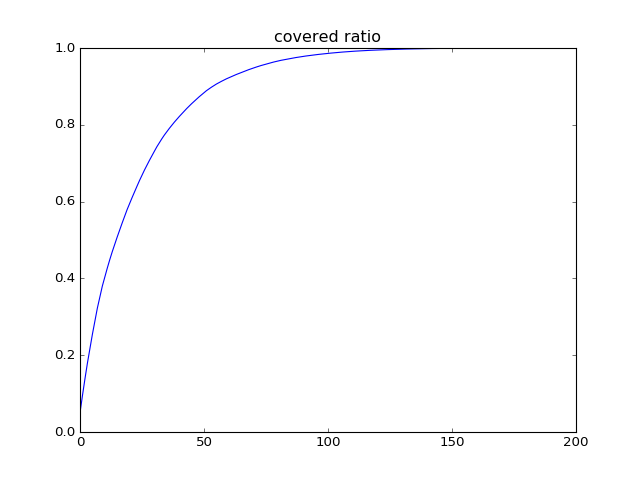

In [32]:
cover_ratio = mypca.cover_ratio()
#cover_ratio = np.real(mypca.eig_val)
plt.figure()
plt.plot(cover_ratio[:200])
plt.title('covered ratio')
plt.show()

Start reconstruction.....
using 200 principle componets to reconstruct data
index of observation taht is going to be reconstructed = 25
dim of observation is (2450,)
dim of loading is (2450, 2450)
dim of score = (1,)
End of score calculation....


<IPython.core.display.Javascript object>


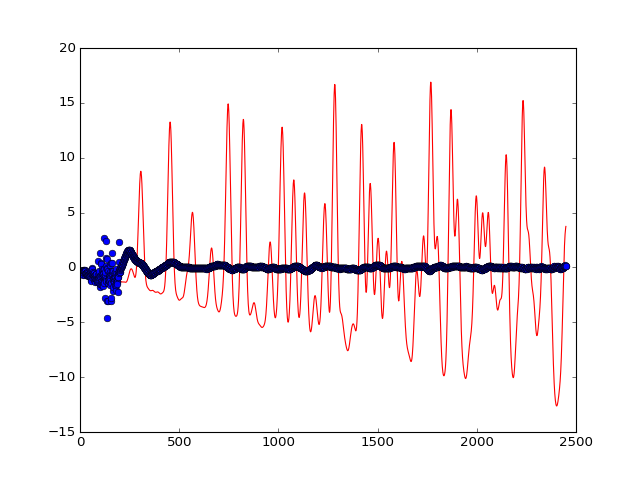

In [34]:
(recon, residual) = mypca.PC_reconstruct(25, 200)

In [10]:
self= mypca
obs_ind = 25
PC_num = 200
obs = self.data[obs_ind]
obs_dim = np.shape(obs)
score = self.cal_score(obs)
reconstruct = np.zeros_like(obs_dim) + self.mean_data
for i in range(PC_num):
    reconstruct += np.dot(np.real(self.loading[i,]),obs[i,])
    print(np.dot(np.real(self.loading[i,]),obs[i,]))
plt.figure()
plt.plot(reconstruct)
plt.show()

dim of observation is (2450,)
dim of loading is (2450, 2450)
dim of score = (1,)


NameError: name 'PC_num' is not defined

In [ ]:
plt.figure()
plt.plot(recon)
plt.figure()
plt.plot(mypca.data[25,])
#plt.figure()
#plt.plot(pct_error)
plt.show()

In [27]:
aa = np.zeros((200,200,200))
qq = aa[1:3,:,:]
pp = aa[1:3]
print(np.shape(qq))
print(np.shape(pp))

(2, 200, 200)
(2, 200, 200)


In [28]:
np.reshape?